# Clustering countries for Financial Aid by Help International NGO (K-Means & Hierarchial Clustering)

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. the CEO of the NGO needs to decide how to use the raised money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

**Aim of the study:**
-To categorise the countries using some socio-economic and health factors that determine the overall development of the country and then to suggest the countries which the CEO needs to focus on the most. 
 
Approach
Based on the business problem and looking at the dataset, following approaches have been taken to solve this problem.

- Reading and understanding the data
- Checking for missing value and treatment
- Outlier analysis and treatment
- Performing the basic EDA to find the variablity and distribution of the data, so as to identify if we need to scale the data
- Data Scaling if necessary
- Hopkins Method to check if the dataset is good enough for a cluster analysis
- Using Hierarchical clustering to identify the optimal cluster value.
- Silhouette and Elbow curve Analysis to validate the optimal cluster values.
- K-Means Cluster method to build the final cluster model.
- Analysing the cluster that is representing the countries that will solve the Business Problem.
- Presenting the final report

## Import packages

In [70]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree



## Reading and Understanding the data

In [72]:
# read the dataset
ngo = pd.read_csv("C:\\Users\\\SOHINI\\Downloads\\upgrad + IIIT-B\\clustering\\Clustering assignment\\Country-data.csv")
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [73]:
# Shape of the dataframe (Rows & Columns)
ngo.shape

(167, 10)

In [74]:
# basic information of the dataframe
ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [75]:
# Descriptive Statistics

ngo.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


**Insight** - Dataframe has data about various countries and their socio-economic and health factors. Few are in % and others in absolute values. - Dataframe has 10 Columns and 167 Rows - One variable is 'Object' Type, and rest all are 'Int' or 'Float' type - Descriptive Statistics tells us that there is variablity in the data, and will require scaling before model building.

## Missing value check

In [76]:
round(100*(ngo.isnull().sum())/len(ngo), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

No missing values are present.

## Dropping duplicates (if any)

In [77]:
# Shape before dropping duplicates
ngo.shape

(167, 10)

In [78]:
# Checking for duplicates and dropping the entire duplicate row if any
ngo.drop_duplicates(subset=None, inplace=True)

In [79]:
# Shape after dropping duplicates
ngo.shape

(167, 10)

There seems to be No duplicate values in the dataset, since the shape before and after drop duplicate is same.


## Data Transformation


In our dataframe (ngo), the 'imports', 'exports' and 'health' variable seems to be in percentage of GDP per capita, and this can sometimes give a incorrect insight in our EDA. For example, the health spending of 'Afghanistan' is 7.58 and that of 'Albania' is '6.55', both of which are very close to each other in health spending in terms of their % of GDP per capita. But these figures do not actually tell us the real story of how rich and poor are 'Afghanistan' and 'Albania' is.  So the best way to tackle it is to convert the % values to Absolute values

In [80]:
#Checking the values before transformation
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [81]:
# Checking the new shape of the dataframe
ngo.shape

(167, 10)

In [82]:
# Converting imports, exports and health spending percentages to absolute values.

ngo['imports'] = ngo['imports'] * ngo['gdpp']/100
ngo['exports'] = ngo['exports'] * ngo['gdpp']/100
ngo['health'] = ngo['health'] * ngo['gdpp']/100

ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Outlier Analysis

In [83]:
# Checking the statistical information again

ngo.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


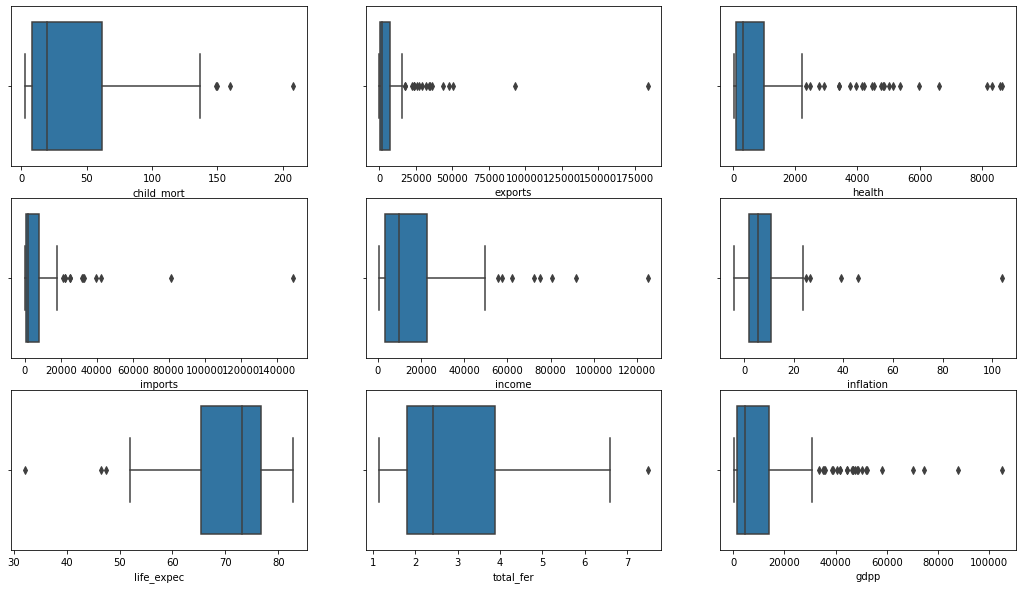

In [84]:
# Chceking the Outlier values

plt.figure(figsize=(18, 10))
plt.subplot(3, 3, 1)
sns.boxplot(ngo.child_mort)
plt.subplot(3, 3, 2)
sns.boxplot(ngo.exports)
plt.subplot(3, 3, 3)
sns.boxplot(ngo.health)
plt.subplot(3, 3, 4)
sns.boxplot(ngo.imports)
plt.subplot(3, 3, 5)
sns.boxplot(ngo.income)
plt.subplot(3, 3, 6)
sns.boxplot(ngo.inflation)
plt.subplot(3, 3, 7)
sns.boxplot(ngo.life_expec)
plt.subplot(3, 3, 8)
sns.boxplot(ngo.total_fer)
plt.subplot(3, 3, 9)
sns.boxplot(ngo.gdpp)
plt.show()

**Insights:**
- There seemes to be outliers in every single variable. This is a very delicate situation in terms of Business problem statement & Clustering analysis. 
- If we apply outlier treatment by Deletion based on IQR values, this will remove few countries from the list that would have really deserved the Financial Aid. 
- If we do not apply Outlier treatment, it can impact the clustering model, as the presence of Outlier can change the centroid (K-Means) of the cluster. 
- After considering all these scenarios and the business call, I have decided to use **SOFT CAPPING** (less number of observations; 167): 
    
  1. to the lower range outliers for 'child_mort','inflation','total_fer' as  the values of these variables need to be high to be eligible for  financial aid and  
  2. to the upper range outliers to the rest of the variables as values of these variables for the countries need to be less to be eligible for financial aid from the NGO. 

## Outlier Treatment

In [85]:
#Getting Lower Control Limit value for variables  'child_mort','inflation' and 'total_fer' and upper Control Limit for other varaiables
upper= ngo.quantile(0.99)
lower= ngo.quantile(0.01)
print("Upper Control Limits")
print(round(upper),2)
print()
print("Lower Control Limits")
print(round(lower),2)

Upper Control Limits
child_mort      153.0
exports       64794.0
health         8410.0
imports       55371.0
income        84374.0
inflation        41.0
life_expec       82.0
total_fer         7.0
gdpp          79088.0
Name: 0.99, dtype: float64 2

Lower Control Limits
child_mort      3.0
exports        22.0
health         17.0
imports       105.0
income        742.0
inflation      -2.0
life_expec     47.0
total_fer       1.0
gdpp          332.0
Name: 0.01, dtype: float64 2


In [86]:
ngo["child_mort"] = ngo["child_mort"].map(lambda x: 3 if x < 3 else x)
ngo["inflation"] = ngo["inflation"].map(lambda x:-2.0 if x < -2.0 else x)
ngo["total_fer"] = ngo["total_fer"].map(lambda x: 1.0 if x < 1.0 else x)
ngo["exports"] = ngo["exports"].map(lambda x: 64794.0 if x > 64794.0 else x)
ngo["health"] = ngo["health"].map(lambda x: 8410.0 if x > 8410.0 else x)
ngo["imports"] = ngo["imports"].map(lambda x: 55371.0 if x > 55371.0 else x)
ngo["income"] = ngo["income"].map(lambda x: 84374.0 if x > 84374.0 else x)
ngo["life_expec"] = ngo["life_expec"].map(lambda x: 82 if x > 82 else x)
ngo["gdpp"] = ngo["gdpp"].map(lambda x: 79088.0 if x >79088.0 else x)


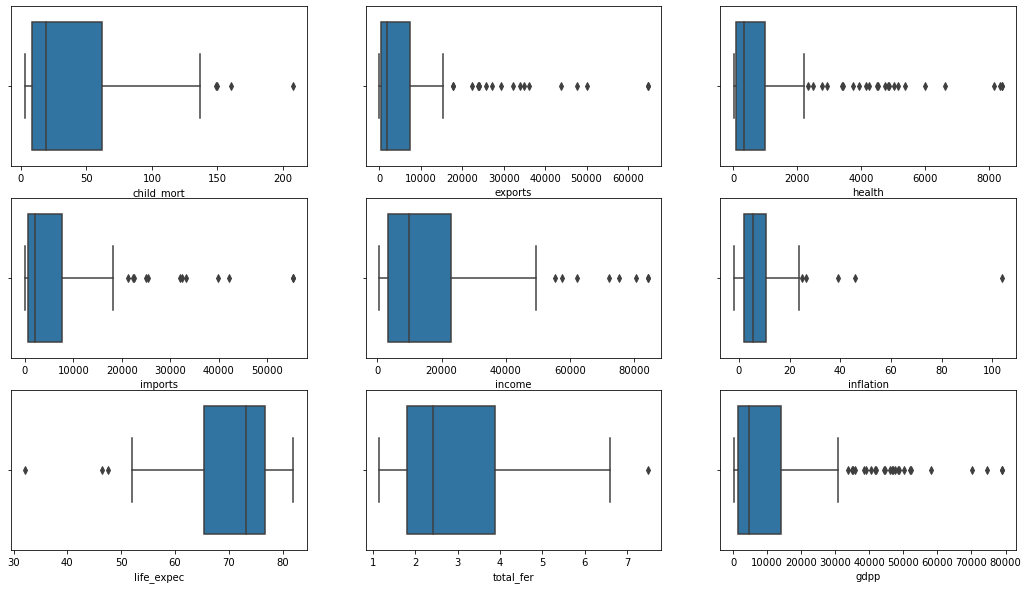

In [87]:
plt.figure(figsize=(18, 10))
plt.subplot(3, 3, 1)
sns.boxplot(ngo.child_mort)
plt.subplot(3, 3, 2)
sns.boxplot(ngo.exports)
plt.subplot(3, 3, 3)
sns.boxplot(ngo.health)
plt.subplot(3, 3, 4)
sns.boxplot(ngo.imports)
plt.subplot(3, 3, 5)
sns.boxplot(ngo.income)
plt.subplot(3, 3, 6)
sns.boxplot(ngo.inflation)
plt.subplot(3, 3, 7)
sns.boxplot(ngo.life_expec)
plt.subplot(3, 3, 8)
sns.boxplot(ngo.total_fer)
plt.subplot(3, 3, 9)
sns.boxplot(ngo.gdpp)
plt.show()

## Exploratory Data Analysis

### Let's make a pairplot of all the numeric variables

In [88]:
ngo.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

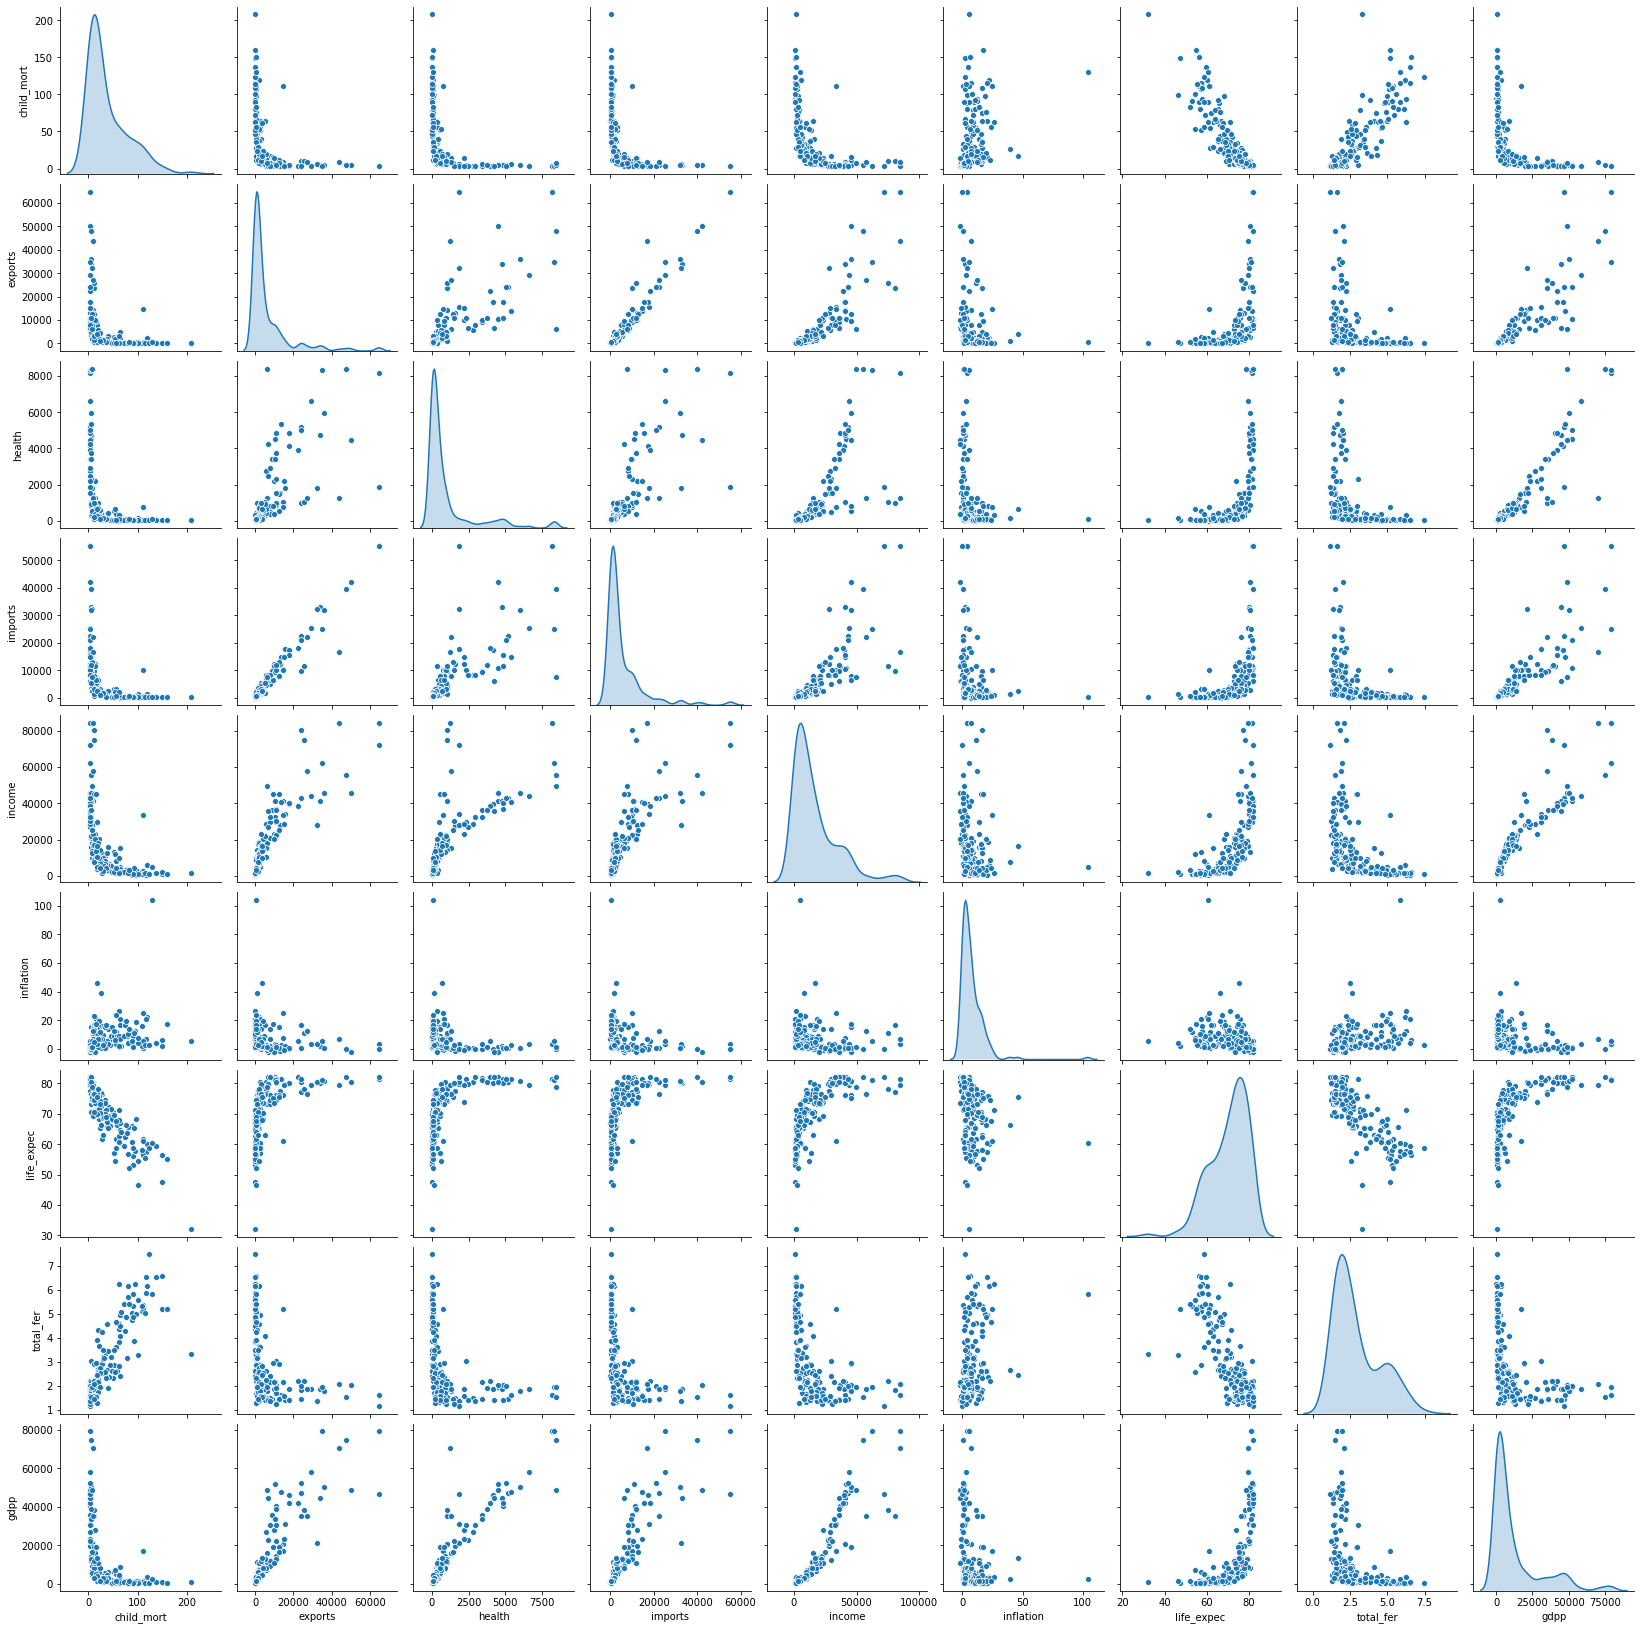

In [89]:
# Let's make a paiplot of teh ngo dataframe
ngo_num = ngo[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

sns.pairplot(ngo_num,diag_kind='kde')


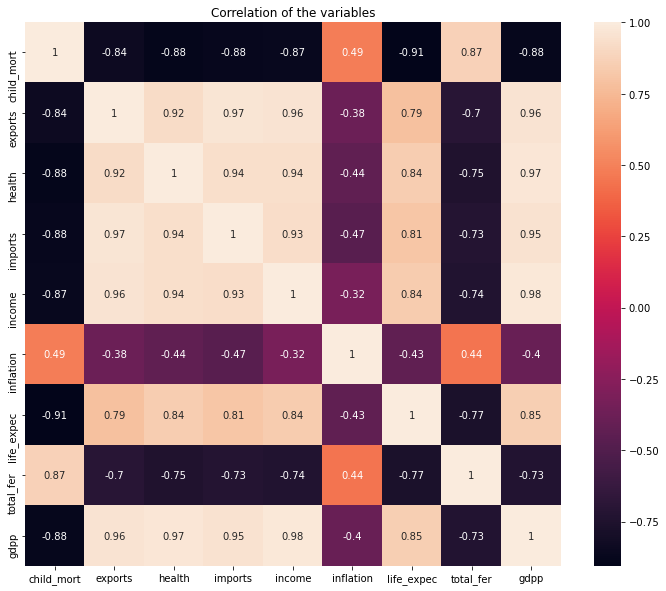

In [90]:
# Plotting heat map to see the correlation of the dataset

# setting figure size and inline

%matplotlib inline 
plt.figure(figsize=(12,10))

# setting title

plt.title("Correlation of the variables")

# Heatmap plotting

sns.heatmap(ngo_num.corr(method='spearman'),annot=True)   # Method is used 'spearman' for monotonic

plt.show() 

**Insights:**
- It can be observed from the pairplot and heatmap that there are high correlations between some variables but it will not affect on clustering. 

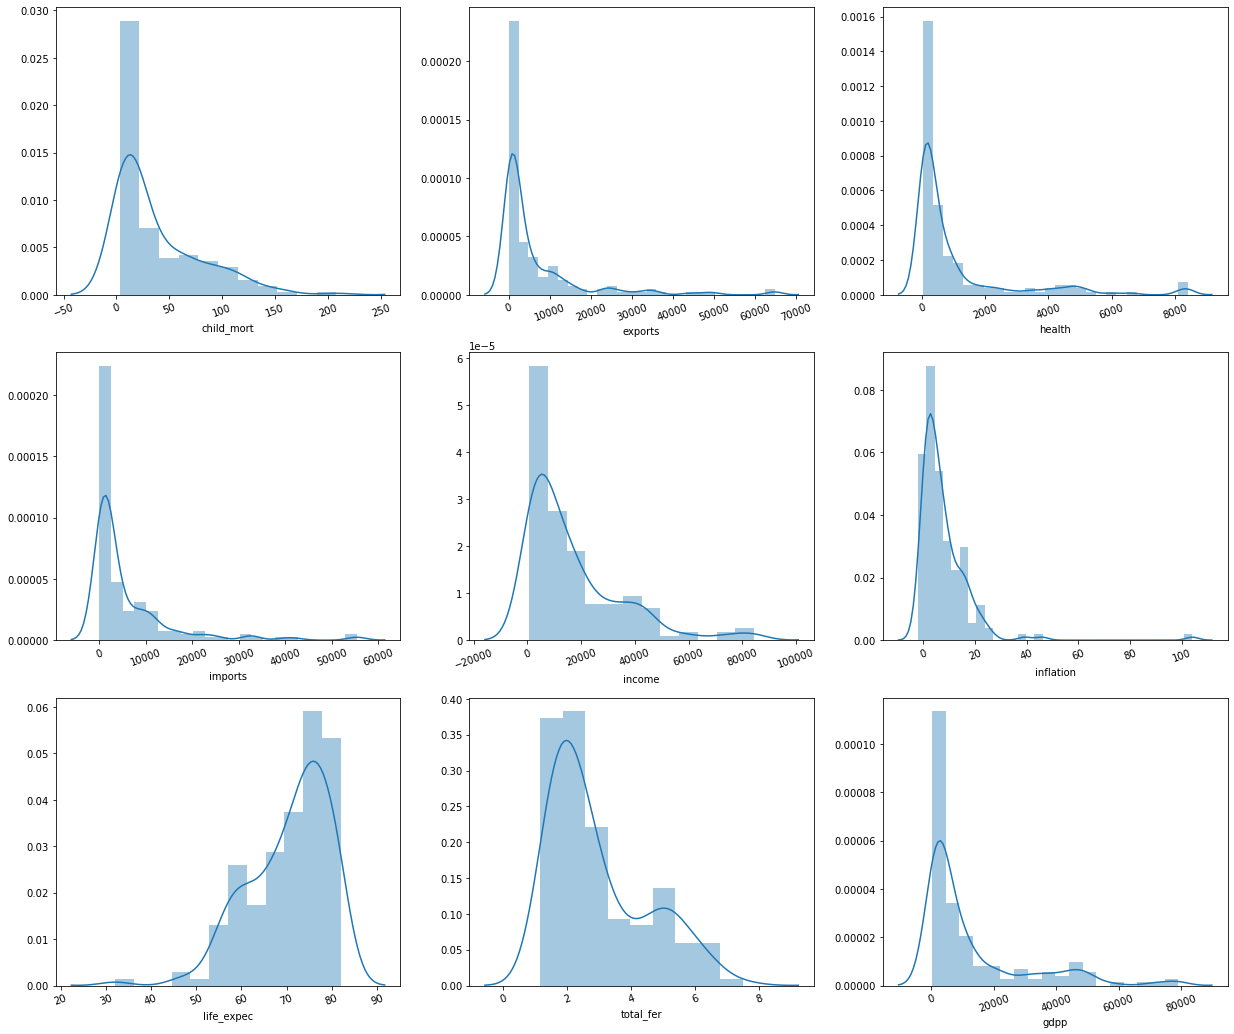

In [91]:
# Checking the distribution plots for each variable 

plt.figure(figsize=(21, 18))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for feature in enumerate(features):
    ax = plt.subplot(3, 3, feature[0]+1)
    sns.distplot(ngo_num[feature[1]])
    plt.xticks(rotation=20)

**Insights:**
- Distribution plots are very important. We can get a rough idea of the no. of clusters from the plots peaks.
- Most of the data point are 'Not Normally' distributed. 
- Almost all the plots have more than one peaks. Like child_mort, income, export, gdpp plots are having more than 2 peaks which clearly says that there can be more than two clusters into which we can categorize the countries.
- Their ranges are also differnt. All the above points indicates the need of standardising the data before we build the model. 
- Since we need to compute the Euclidean distance between the data points, it is important to ensure that the attributes with a larger range of values do not out-weight the attributes with smaller range. Thus, scaling down of all attributes to the same normal scale is important here.


## Scaling the data

In [92]:
ngo.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [93]:
# dataframe containing only the numerical variables 

ngo_num

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...
162,29.2,1384.02,155.9250,1565.190,2950.0,2.62,63.0,3.50,2970.0
163,17.1,3847.50,662.8500,2376.000,16500.0,45.90,75.4,2.47,13500.0
164,23.3,943.20,89.6040,1050.620,4490.0,12.10,73.1,1.95,1310.0
165,56.3,393.00,67.8580,450.640,4480.0,23.60,67.5,4.67,1310.0


In [94]:
ngo_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    float64
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    float64
dtypes: float64(9)
memory usage: 18.0 KB


In [95]:
ngo_num.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.274850,6538.211662,1054.202665,5873.130551,16857.550898,7.802371,70.545509,2.947964,12756.826347
std,40.324698,11415.292604,1790.828991,9422.676186,17957.012855,10.549727,8.879581,1.513848,17430.208938
min,3.000000,1.076920,12.821200,0.651092,609.000000,-2.000000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,64794.000000,8410.000000,55371.000000,84374.000000,104.000000,82.000000,7.490000,79088.000000


In [96]:
# rescaling

# instantiate
scaler = StandardScaler()

# fit_transform
ngo_scaled = scaler.fit_transform(ngo_num)
ngo_scaled.shape

(167, 9)

In [97]:
ngo_scaled

array([[ 1.29154881, -0.56962265, -0.56696075, ..., -1.62042038,
         1.90288227, -0.70225949],
       [-0.53912463, -0.47385831, -0.44039521, ...,  0.65000793,
        -0.85997281, -0.49872564],
       [-0.27298053, -0.42400006, -0.48627304, ...,  0.67259925,
        -0.0384044 , -0.47743428],
       ...,
       [-0.37247365, -0.49160709, -0.54025243, ...,  0.2885467 ,
        -0.66120626, -0.65869853],
       [ 0.4483446 , -0.53995055, -0.55243193, ..., -0.34401044,
         1.14094382, -0.65869853],
       [ 1.11494852, -0.52701679, -0.54227432, ..., -2.09483824,
         1.6246091 , -0.6500669 ]])

In [98]:
#Converting it into a dataframe

ngo_scaled = pd.DataFrame(ngo_scaled)
ngo_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
ngo_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291549,-0.569623,-0.566961,-0.598742,-0.851668,0.155696,-1.620420,1.902882,-0.702259
1,-0.539125,-0.473858,-0.440395,-0.413585,-0.386946,-0.314921,0.650008,-0.859973,-0.498726
2,-0.272981,-0.424000,-0.486273,-0.476101,-0.221053,0.788891,0.672599,-0.038404,-0.477434
3,2.007899,-0.381249,-0.534091,-0.463973,-0.612045,1.387859,-1.179890,2.128151,-0.530950
4,-0.695826,-0.086742,-0.178409,0.139729,0.125254,-0.604898,0.706486,-0.541946,-0.032042


## Hopkins Statistics 

Before we apply any clustering algorithm to the data, it's important to check whether the given data has some meaningful clusters or not. This in general means the given data is not random. The process to evaluate the data to check if the data is feasible for clustering or not is known as the clustering tendency. To check cluster tendency, we use Hopkins test. Hopkins test examines whether data points differ significantly from uniformly distributed data in the multidimensional space.

In [99]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [100]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(ngo_scaled)

0.883289036763263

**Insights:**
- Hopkins Statistic over .70 is a good score which says that the data is good for cluster analysis.
- A 'Hopkins Statistic' value close to 1 indicates that the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.

## Modelling

Now coming to the Modelling part, **HIERARCHICAL CLUSTERING** will be used to identify the appropriate cluster size with a good split of data. Hierarchical clustering is chosen first because here dytaset is small so the time complexity will not be an issue. And also in Hierarchical clustering we dont need to assume the no. of clusters. 

In [101]:
ngo_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291549,-0.569623,-0.566961,-0.598742,-0.851668,0.155696,-1.620420,1.902882,-0.702259
1,-0.539125,-0.473858,-0.440395,-0.413585,-0.386946,-0.314921,0.650008,-0.859973,-0.498726
2,-0.272981,-0.424000,-0.486273,-0.476101,-0.221053,0.788891,0.672599,-0.038404,-0.477434
3,2.007899,-0.381249,-0.534091,-0.463973,-0.612045,1.387859,-1.179890,2.128151,-0.530950
4,-0.695826,-0.086742,-0.178409,0.139729,0.125254,-0.604898,0.706486,-0.541946,-0.032042


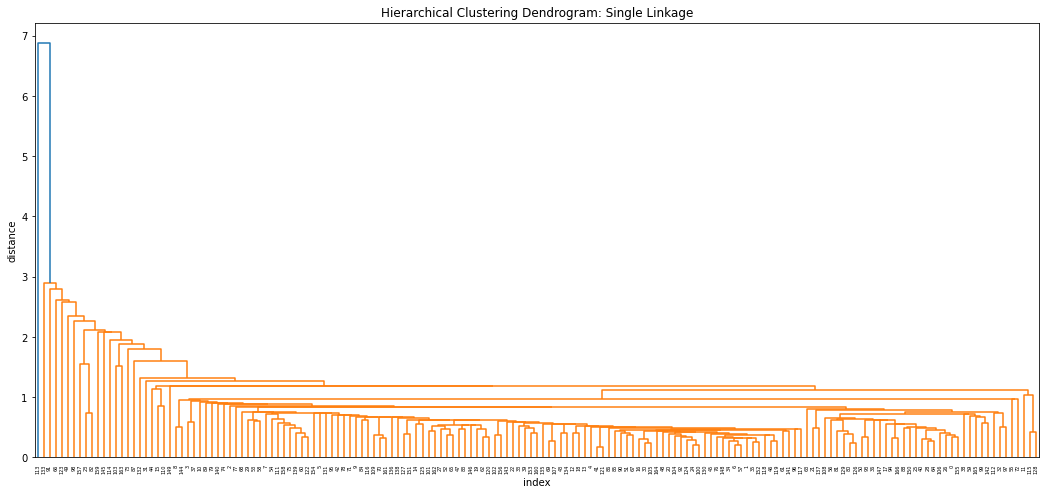

In [102]:
# single linkage: Here, the distance between 2 clusters is defined as the shortest distance between points in the two clusters.

plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram: Single Linkage')
plt.xlabel('index')
plt.ylabel('distance')
mergings_s = linkage(ngo_scaled, method="single", metric='euclidean')
dendrogram(mergings_s)
plt.show()

Result of single linkage is not much decipherable. So I will go for complete linkage.

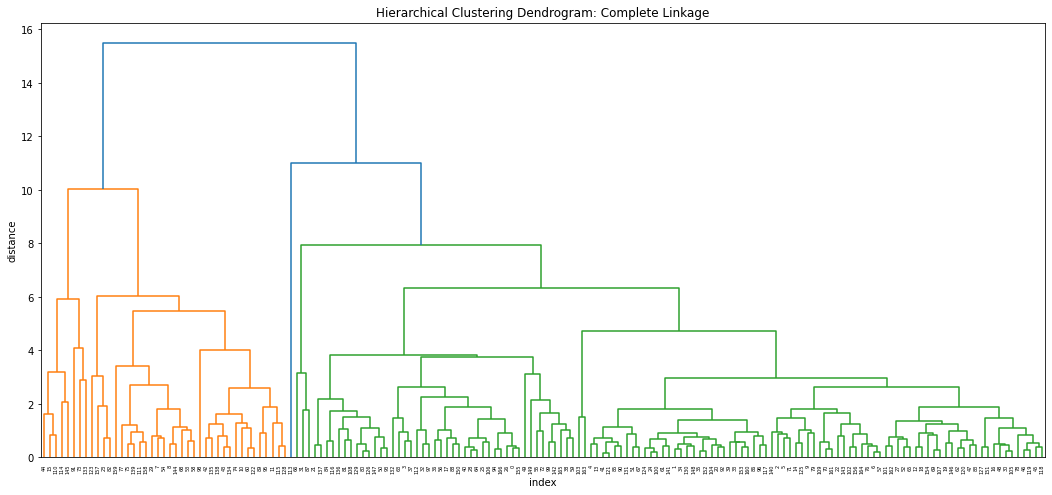

In [103]:
# complete linkage : Here, the distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters.

plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram: Complete Linkage')
plt.xlabel('index')
plt.ylabel('distance')
mergings_c = linkage(ngo_scaled, method="complete", metric='euclidean')
dendrogram(mergings_c)
plt.show()

**Insights:**
- From the above Dendrograms, it is evident that 'Complete Linkage' give a better cluster formation and it is more readable. So we will use Complete linkage output for our further analysis. We will build two iterations of clustering with 3 & 4 clusters and analyse the output.

### 1st Iteration: Using number of clusters=3

In [104]:
# 3 clusters
cluster_labels_3 = cut_tree(mergings_c, n_clusters=3).reshape(-1, )
cluster_labels_3

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [105]:
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [106]:
# Create a new datafame with cluster labels to it.

ngo_country_1 = ngo.copy()
ngo_country_1['cluster_labels_3'] = cluster_labels_3

ngo_country_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [107]:
ngo_country_1.shape

(167, 11)

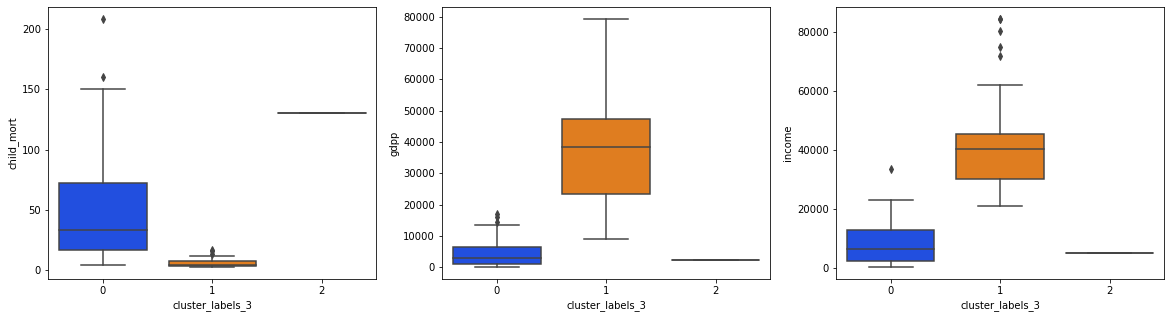

In [108]:
# Box plot on various variable against the Cluster label to visualize the spread of the data

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_3', y='child_mort', data=ngo_country_1, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_3', y='gdpp', data=ngo_country_1, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_3', y='income', data=ngo_country_1, palette="bright")

plt.show()

**Insights:**
  **Observations from the boxplots on 3 variables(child_mort, gdpp and income against cluster label)**
- **child_mort vs cluster_labels_3:** cluster 0 has the high child mortality. It spread upto ~210. Maximum datapoints ranges between ~20-75. Next is cluster 2 which has only one value ~130.And cluster 1 has the least child mortality value.
- **gdpp vs cluster_labels_3:** cluster 1 has the highest gdpp spread upto ~80000.
- **income vs cluster_labels_3:** cluster 1 has the highest income value spread upto ~70000.
    
    So from this plot we can make a rough idea that the probable cluster that can not be in our bucket is cluster 1, having the least child mortality and highest gdpp and income. So we should further consider cluster 2 and 0.


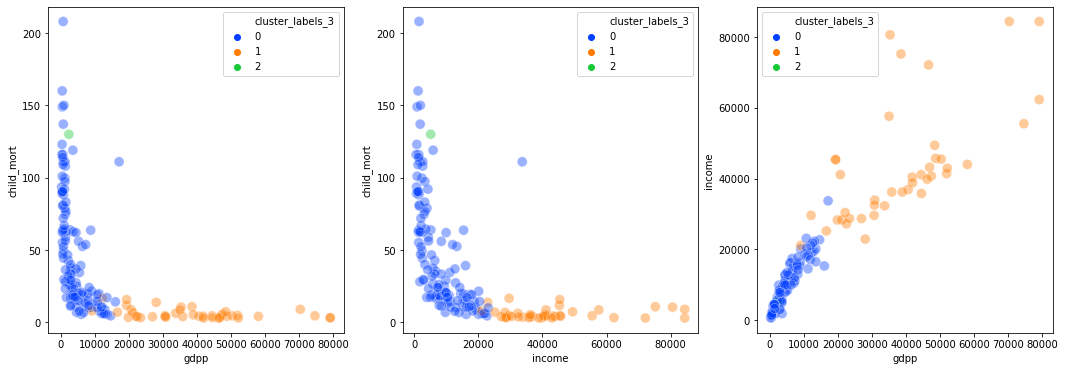

In [109]:
# Scatter plot on various variables to visualize the clusters based on them
 
plt.figure(figsize=(18,6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_3',
                data=ngo_country_1, legend='full', palette="bright", s=100, c= "lightblue", alpha=.4)
# labeling different cluster points with country names 

# for i, txt in enumerate(ngo_country_1.country):
#     plt.annotate(txt, (ngo_country_1.gdpp[i],ngo_country_1.child_mort[i]))

plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_3',
                data=ngo_country_1, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_3',
                data=ngo_country_1, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()


**Insights:**
    
**Scatter plots comparing child mortality, gdpp and income with each one of them and visualizing for different countries**

- **child_mort vs gdpp:** cluster 0 having low gdpp with both low and high child mortality value,cluster 2 having low child moratlity values with gdpp from ~ 10000 to 80000 and cluster 2 having only 1 datapoint 
- **child_mort vs gdpp:** cluster 0 having low income with both low and high child mortality value,cluster 2 having low child moratlity values with gdpp from ~ 10000 to 80000 and cluster 2 having only 1 datapoint


In [110]:
# Checking cluster count

ngo_country_1.cluster_labels_3.value_counts()

0    125
1     41
2      1
Name: cluster_labels_3, dtype: int64

In [111]:
ngo_country_1[ngo_country_1["cluster_labels_3"]==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3
113,Nigeria,130.0,589.49,118.131,405.42,5150.0,104.0,60.5,5.84,2330.0,2


In [112]:
ngo_country_1[ngo_country_1["cluster_labels_3"]==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3
7,Australia,4.8,10276.20,4530.870,10847.1,41400.0,1.160,82.0,1.93,51900.0,1
8,Austria,4.3,24059.70,5159.000,22418.2,43200.0,0.873,80.5,1.44,46900.0,1
10,Bahamas,13.8,9800.00,2209.200,12236.0,22900.0,-0.393,73.8,1.86,28000.0,1
11,Bahrain,8.6,14386.50,1028.790,10536.3,41100.0,7.440,76.0,2.16,20700.0,1
15,Belgium,4.5,33921.60,4750.800,33166.8,41100.0,1.880,80.0,1.86,44400.0,1
23,Brunei,10.5,23792.20,1002.520,9884.0,80600.0,16.700,77.1,1.84,35300.0,1
29,Canada,5.6,13793.40,5356.200,14694.0,40700.0,2.870,81.3,1.63,47400.0,1
42,Cyprus,3.6,15461.60,1838.760,17710.0,33900.0,2.010,79.9,1.42,30800.0,1
43,Czech Republic,3.4,13068.00,1560.240,12454.2,28300.0,-1.430,77.5,1.51,19800.0,1
44,Denmark,4.1,29290.00,6612.000,25288.0,44000.0,3.220,79.5,1.87,58000.0,1


In [113]:
ngo_country_1[ngo_country_1["cluster_labels_3"]==0].sort_values(by=["income","gdpp"], ascending=[True,True])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,0
...,...,...,...,...,...,...,...,...,...,...,...
121,Poland,6.0,5052.6000,939.9600,5304.600,21800.0,1.66,76.3,1.41,12600.0,0
67,Hungary,6.0,10715.8000,960.2300,10021.500,22300.0,2.33,74.5,1.25,13100.0,0
51,Estonia,4.5,10964.6000,880.3800,10030.200,22700.0,1.74,76.0,1.72,14600.0,0
125,Russia,10.0,3124.4000,543.5600,2257.700,23100.0,14.20,69.2,1.57,10700.0,0


**Insights:**
- Cluster 1 seems to contain Developed or Developing countries,having higher gdpp, income and less child mortality. So our segmentation is good in terms of all other under developed countries are segmented under cluster 0 and 2. We will further fine tune this cluster.

### 2nd Iteration: Uisng cluster number = 4 

In [114]:
# 4 clusters
cluster_labels_4 = cut_tree(mergings_c, n_clusters=4).reshape(-1, )
cluster_labels_4

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 3, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [115]:
ngo_country_1['cluster_labels_4'] = cluster_labels_4

ngo_country_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,0


In [116]:
ngo_country_1.shape

(167, 12)

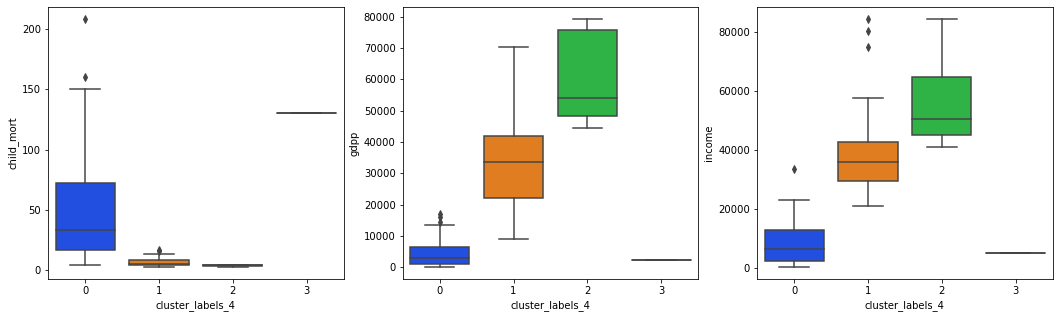

In [117]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_4', y='child_mort', data=ngo_country_1, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_4', y='gdpp', data=ngo_country_1, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_4', y='income', data=ngo_country_1, palette="bright")

plt.show()

-

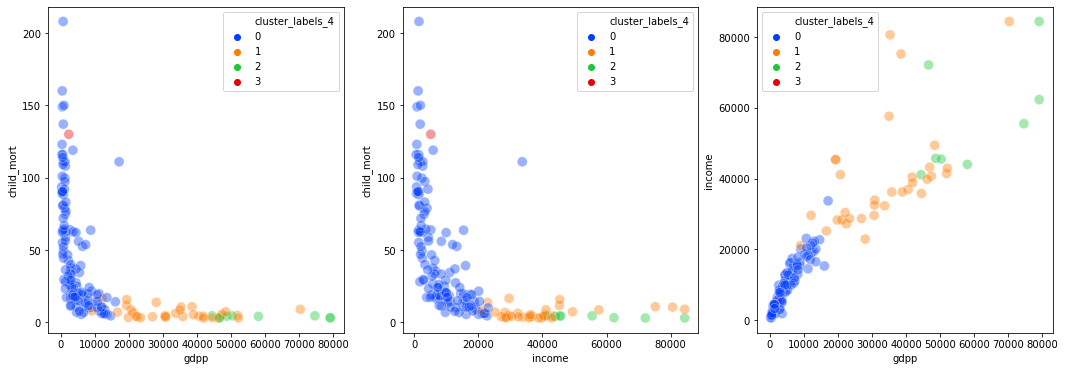

In [118]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_4',
                data=ngo_country_1, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_4',
                data=ngo_country_1, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_4',
                data=ngo_country_1, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()


**Insights:**
 
**From both these boxplots and scatterplots** we are getting almost the same observations like cluster 3. Only cluster 1 which was having roughly all the developed and developing countries here divided into 2 clusters. one cluster having low child mortality, very high gdpp and income. And the other cluster is having low child mortality, and intermediate gdpp and income. Underdeveloped countries remain as same.

In [119]:
ngo_country_1.cluster_labels_4.value_counts()

0    125
1     33
2      8
3      1
Name: cluster_labels_4, dtype: int64

In [120]:
ngo_country_1[ngo_country_1["cluster_labels_4"]==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
113,Nigeria,130.0,589.49,118.131,405.42,5150.0,104.0,60.5,5.84,2330.0,2,3


In [121]:
ngo_country_1[ngo_country_1["cluster_labels_4"]==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
15,Belgium,4.5,33921.6,4750.80,33166.8,41100.0,1.880,80.0,1.86,44400.0,1,2
44,Denmark,4.1,29290.0,6612.00,25288.0,44000.0,3.220,79.5,1.87,58000.0,1,2
73,Ireland,4.2,50161.0,4475.53,42125.5,45700.0,-2.000,80.4,2.05,48700.0,1,2
91,Luxembourg,3.0,64794.0,8158.50,55371.0,84374.0,3.620,81.3,1.63,79088.0,1,2
110,Netherlands,4.5,36216.0,5985.70,31990.8,45500.0,0.848,80.7,1.79,50300.0,1,2
114,Norway,3.2,34856.6,8323.44,25023.0,62300.0,5.950,81.0,1.95,79088.0,1,2
133,Singapore,3.0,64794.0,1845.36,55371.0,72100.0,-0.046,82.0,1.15,46600.0,1,2
145,Switzerland,4.5,47744.0,8410.00,39761.8,55500.0,0.317,82.0,1.52,74600.0,1,2


In [122]:
ngo_country_1[ngo_country_1["cluster_labels_4"]==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
7,Australia,4.8,10276.20,4530.870,10847.1,41400.0,1.160,82.0,1.93,51900.0,1,1
8,Austria,4.3,24059.70,5159.000,22418.2,43200.0,0.873,80.5,1.44,46900.0,1,1
10,Bahamas,13.8,9800.00,2209.200,12236.0,22900.0,-0.393,73.8,1.86,28000.0,1,1
11,Bahrain,8.6,14386.50,1028.790,10536.3,41100.0,7.440,76.0,2.16,20700.0,1,1
23,Brunei,10.5,23792.20,1002.520,9884.0,80600.0,16.700,77.1,1.84,35300.0,1,1
29,Canada,5.6,13793.40,5356.200,14694.0,40700.0,2.870,81.3,1.63,47400.0,1,1
42,Cyprus,3.6,15461.60,1838.760,17710.0,33900.0,2.010,79.9,1.42,30800.0,1,1
43,Czech Republic,3.4,13068.00,1560.240,12454.2,28300.0,-1.430,77.5,1.51,19800.0,1,1
53,Finland,3.0,17879.40,4134.900,17278.8,39800.0,0.351,80.0,1.87,46200.0,1,1
54,France,4.2,10880.80,4831.400,11408.6,36900.0,1.050,81.4,2.03,40600.0,1,1



**Insights:**
- From the above 2 iterations of Hierarchical Clustering, it is evident that 3 Clusters is ideal number of clusters, because when we used 4 clusters, it can be observed that still Nigeria was remained as a seperate segment. Increasing the number of clusters didn't work. The clusters reamined unbalanced. Only the developing and develped countries got further clssified which will not help to solve our business problem. So I will do further cluster profiling assuming k=3.



## Cluster Profiling

In [123]:
#New dataframe for group by & analysis
ngo_country_1_analysis =  ngo_country_1.groupby(['cluster_labels_3']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])
ngo_country_1_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_4
cluster_labels_3,,,,,,,,,,
2,130.000000,589.490000,118.131000,405.420000,5150.000000,104.000000,60.50000,5.840000,2330.000000,3.000000
0,48.123200,1857.956220,283.153529,2010.219057,8396.104000,8.381872,67.69680,3.288720,4360.912000,0.000000
1,6.012195,20952.373902,3427.793244,17783.658537,42940.195122,3.689317,79.47561,1.838537,38608.439024,1.195122


In [124]:
# Creating a new field for count of observations in each cluster
ngo_country_1_analysis['Observations']=ngo_country_1[['cluster_labels_3','child_mort']].groupby(['cluster_labels_3']).count()
ngo_country_1_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_4,Observations
cluster_labels_3,,,,,,,,,,,
2,130.000000,589.490000,118.131000,405.420000,5150.000000,104.000000,60.50000,5.840000,2330.000000,3.000000,1
0,48.123200,1857.956220,283.153529,2010.219057,8396.104000,8.381872,67.69680,3.288720,4360.912000,0.000000,125
1,6.012195,20952.373902,3427.793244,17783.658537,42940.195122,3.689317,79.47561,1.838537,38608.439024,1.195122,41


In [125]:
# Creating a new field for proportion of observations in each cluster
ngo_country_1_analysis['Proportion']=round(ngo_country_1_analysis['Observations']/ngo_country_1_analysis['Observations'].sum(),2)
ngo_country_1_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_4,Observations,Proportion
cluster_labels_3,,,,,,,,,,,,
2,130.000000,589.490000,118.131000,405.420000,5150.000000,104.000000,60.50000,5.840000,2330.000000,3.000000,1,0.01
0,48.123200,1857.956220,283.153529,2010.219057,8396.104000,8.381872,67.69680,3.288720,4360.912000,0.000000,125,0.75
1,6.012195,20952.373902,3427.793244,17783.658537,42940.195122,3.689317,79.47561,1.838537,38608.439024,1.195122,41,0.25


<Figure size 576x360 with 0 Axes>

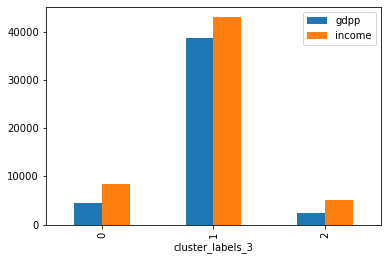

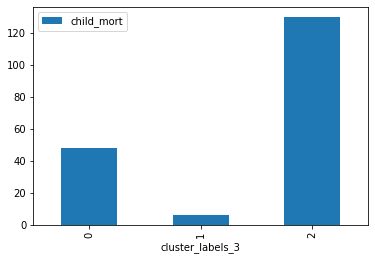

In [126]:

plt.figure(figsize=(8, 5))
ngo_country_1_plot1=ngo_country_1[['cluster_labels_3','gdpp','income']].copy()
ngo_country_1_plot1=ngo_country_1_plot1.groupby('cluster_labels_3').mean()
ngo_country_1_plot1.plot.bar()

ngo_country_1_plot2=ngo_country_1[['cluster_labels_3','child_mort']].copy()
ngo_country_1_plot2=ngo_country_1_plot2.groupby('cluster_labels_3').mean()
ngo_country_1_plot2.plot.bar()

**Interpretation of Clusters:**
- Cluster 2 which has only 1% of the data has the Highest average Child Mortality rate of ~130 when compared to other 2 clusters, and Lowest average GDPP & Income of 2330 and 5150 respectively. All these figures clearly makes this cluster the best candidate for the financial aid from NGO. It can be also seen that Cluster 0 comprises of ~75% of overall data, and has ~125 observations in comparision to 167 total observations This seems to be a problem. This means that Hierarchical clustering is not giving us a good result as 75% of the data points are segmented into that cluster. We also saw that increasing the cluster number is not solving this problem. We will perform K-Means Clustering and check how that turns out to be.

## Finding the Optimal Number of Clusters

### SSD (Elbow Curve)

In [127]:
#Checking the dataframe
ngo_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291549,-0.569623,-0.566961,-0.598742,-0.851668,0.155696,-1.620420,1.902882,-0.702259
1,-0.539125,-0.473858,-0.440395,-0.413585,-0.386946,-0.314921,0.650008,-0.859973,-0.498726
2,-0.272981,-0.424000,-0.486273,-0.476101,-0.221053,0.788891,0.672599,-0.038404,-0.477434
3,2.007899,-0.381249,-0.534091,-0.463973,-0.612045,1.387859,-1.179890,2.128151,-0.530950
4,-0.695826,-0.086742,-0.178409,0.139729,0.125254,-0.604898,0.706486,-0.541946,-0.032042


In [128]:
ngo_scaled.shape

(167, 9)

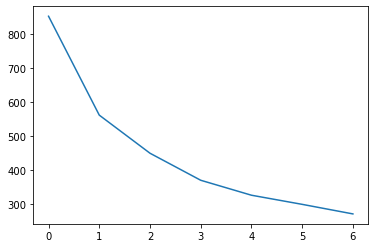

In [129]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(ngo_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

## Silhouette Analysis
### silhouette score=p−q/max(p,q)
 
p  is the mean distance to the points in the nearest cluster that the data point is not a part of

q  is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [130]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(ngo_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(ngo_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.47853612914524724
For n_clusters=3, the silhouette score is 0.4226468194980049
For n_clusters=4, the silhouette score is 0.4085190886848701
For n_clusters=5, the silhouette score is 0.41501726369684255
For n_clusters=6, the silhouette score is 0.3075033445255576
For n_clusters=7, the silhouette score is 0.3215669670631089
For n_clusters=8, the silhouette score is 0.29187015371825764


**Insights**: 

From the above validations(Elbow Curve & silhouette analysis), we could see that 

- 2 has the highest silhouette score. However, in practice, it is never to be considered.
- So we can consider k=3 which has the next highest score followed by 4 and 5.
- These clusters are optimal number of clusters to be used. I will try 3 different iterations in K-Means clustering using 3,4 and 5 Clusters and analyse the results.

## K-Means Clustering

### First Iteration - Using 3 Clusters¶

In [131]:
# K Means with with k=3
kmeans_3 = KMeans(n_clusters=3, max_iter=50, random_state=50)
kmeans_3.fit(ngo_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=50)

In [132]:
kmeans_3.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [133]:
# Create a new datafame with scaled data and adding country name to it.
ngo_country_2 = ngo_country_1.copy()
ngo_country_2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,0


In [134]:
ngo_country_2.shape

(167, 12)

In [135]:
# assign the label
ngo_country_2['cluster_id_3'] = kmeans_3.labels_
ngo_country_2.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,0,0


In [136]:
# Checking the number of countries in each cluster

ngo_country_2.cluster_id_3.value_counts()

0    92
2    48
1    27
Name: cluster_id_3, dtype: int64

## Visualizing the Clustered Data

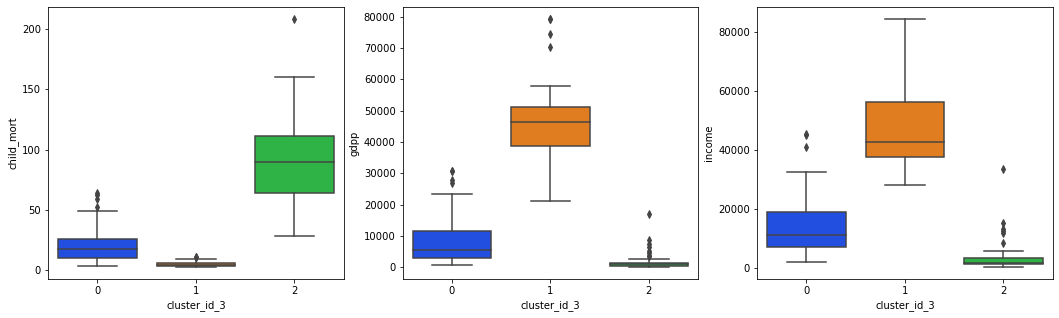

In [137]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_3', y='child_mort',
            data=ngo_country_2, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_3', y='gdpp',
            data=ngo_country_2, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_3', y='income',
            data=ngo_country_2, palette="bright")

plt.show()

**Insights:**

Here we are getting almost a balanced distributed categories. 

- **CLUSTER 0** is having low child mortality, low gdpp and low income.
- **CLUSTER 1** is having least child mortality, highest gdpp and income range.
- **CLUSTER 2** is having highest child mortality, least gdpp and income range.

So from this we can getting **CLUSTER 2** is the one which we are supposed to be look after and work on to get the final countries. 

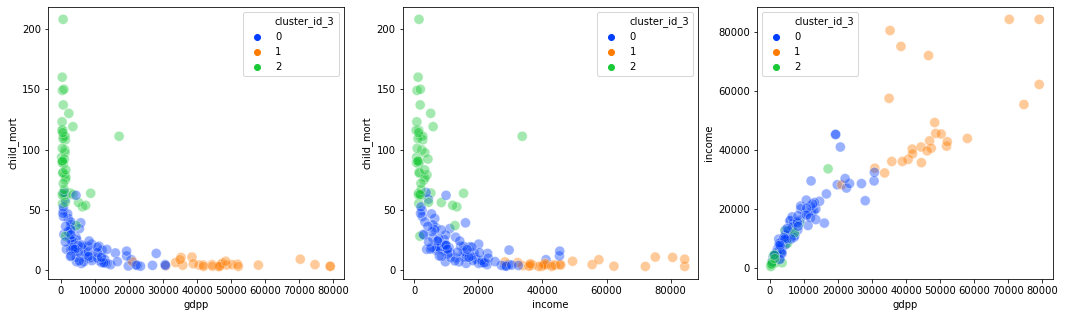

In [138]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_3',
                data=ngo_country_2, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_id_3',
                data=ngo_country_2, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id_3',
                data=ngo_country_2, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

**Insights:**
 
Here the three important variables child mortality, income and gdpp are compared with each other based on clusters.
 
Again from these scatterplots we are getting the same results:
- **CLUSTER 0** is having low child mortality, low gdpp and low income.
- **CLUSTER 1** is having least child mortality, highest gdpp and income range.
- **CLUSTER 2** is having highest child mortality, least gdpp and income range

So **CLUSTER 2** is the one on which we have to work.

In [139]:
# Checking the CLuster means:
ngo_country_2.groupby(['cluster_id_3']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
cluster_id_3,,,,,,,,,,,
2,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.041667,0.062500
0,20.177174,3650.066288,573.165330,3759.545881,14169.456522,7.019457,73.552174,2.225652,8226.869565,0.152174,0.152174
1,5.122222,26440.007407,4363.303333,22045.822222,49057.333333,3.165593,80.400000,1.775185,47476.888889,1.000000,1.296296


**Insights:** Cluster 2  seems to have highest Child Mortality and lowest Income & GDPP. Lets check the countries in thism cluster to see there outcome.

In [140]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

ngo_country_2[['country','child_mort','income','gdpp']][ngo_country_2['cluster_id_3'] == 2].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
66,Haiti,208.0,1500.0,662.0
132,Sierra Leone,160.0,1220.0,399.0
32,Chad,150.0,1930.0,897.0
31,Central African Republic,149.0,888.0,446.0
97,Mali,137.0,1870.0,708.0
113,Nigeria,130.0,5150.0,2330.0
112,Niger,123.0,814.0,348.0
3,Angola,119.0,5900.0,3530.0
37,"Congo, Dem. Rep.",116.0,609.0,334.0
25,Burkina Faso,116.0,1430.0,575.0


In [141]:
# Checking the countries in Cluster 0 to see which are the countries in that segment.

ngo_country_2[['country','child_mort','income','gdpp']][ngo_country_2['cluster_id_3'] == 0].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
107,Myanmar,64.4,3720.0,988.0
154,Turkmenistan,62.0,9940.0,4440.0
69,India,58.8,4410.0,1350.0
146,Tajikistan,52.4,2110.0,738.0
12,Bangladesh,49.4,2440.0,758.0
...,...,...,...,...
122,Portugal,3.9,27200.0,22500.0
60,Greece,3.9,28700.0,26900.0
139,Spain,3.8,32500.0,30700.0
43,Czech Republic,3.4,28300.0,19800.0


In [142]:
# Checking the countries in Cluster 0 to see which are the countries in that segment.

ngo_country_2[['country','child_mort','income','gdpp']][ngo_country_2['cluster_id_3'] == 1].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
82,Kuwait,10.8,75200.0,38500.0
23,Brunei,10.5,80600.0,35300.0
123,Qatar,9.0,84374.0,70300.0
157,United Arab Emirates,8.6,57600.0,35000.0
159,United States,7.3,49400.0,48400.0
98,Malta,6.8,28300.0,21100.0
111,New Zealand,6.2,32300.0,33700.0
29,Canada,5.6,40700.0,47400.0
158,United Kingdom,5.2,36200.0,38900.0
7,Australia,4.8,41400.0,51900.0


## Second Iteration - Using 4 Clusters

In [143]:
# K Means with with k=4
kmeans_4 = KMeans(n_clusters=4, max_iter=50, random_state=50)
kmeans_4.fit(ngo_scaled)

KMeans(max_iter=50, n_clusters=4, random_state=50)

In [144]:
kmeans_4.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 3, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       3, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 3, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 3, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       3, 0, 1, 1, 3, 0, 1, 2, 2, 2, 2, 2, 0, 3, 2, 2, 1, 2, 0, 1, 2, 2,
       1, 3, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 3, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [145]:
# assign the label
ngo_country_2['cluster_id_4'] = kmeans_4.labels_
ngo_country_2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_3,cluster_id_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0,2,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0,0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0,0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0,2,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,0,0,2


In [146]:
# Checking the number of countries in each cluster

ngo_country_2.cluster_id_4.value_counts()

2    80
1    48
0    30
3     9
Name: cluster_id_4, dtype: int64

## Visualizing the Clustered Data

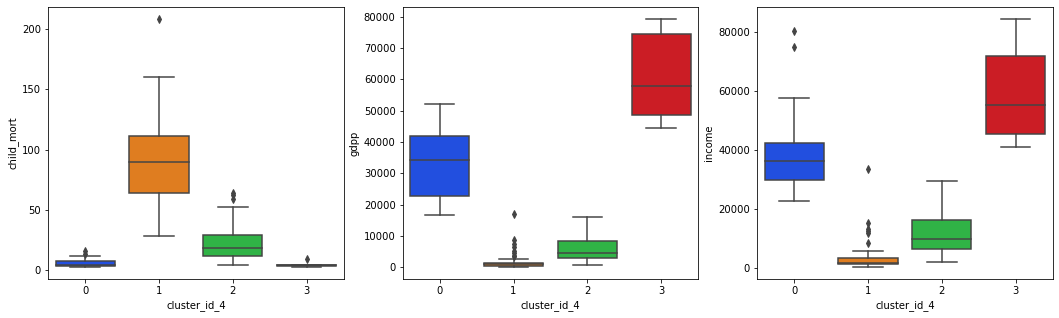

In [147]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_4', y='child_mort',
            data=ngo_country_2, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_4', y='gdpp',
            data=ngo_country_2, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_4', y='income',
            data=ngo_country_2, palette="bright")

plt.show()

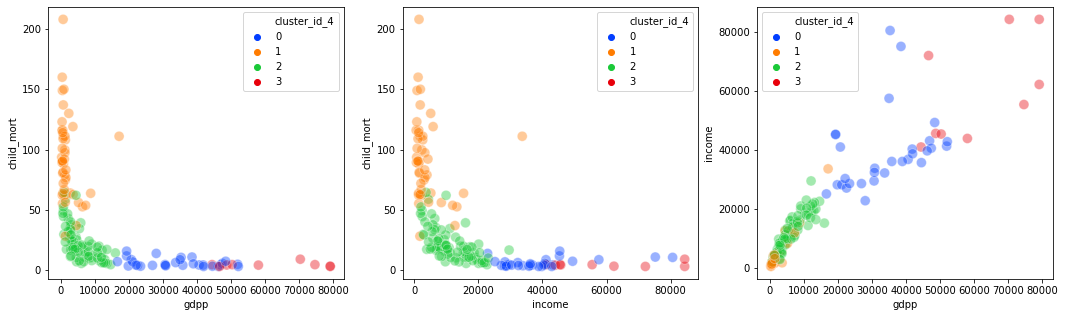

In [148]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_4',
                data=ngo_country_2, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_id_4',
                data=ngo_country_2, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id_4',
                data=ngo_country_2, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

**Insights:**

From both boxplots and scatterplots we are getting:
    
- **CLUSTER 0** is having very low child mortality, high gdpp and income range.
- **CLUSTER 1** is having highest child mortality, least gdpp and income range.
- **CLUSTER 2** is having low child mortality, low gdpp and income range.
- **CLUSTER 3** is having least child mortality, highest gdpp and income range.

So from this we can again getting  **CLUSTER 1** is the one  which we are supposed to be look after and work on to get the final countries.

In [149]:
# Checking the CLuster means:
ngo_country_2.groupby(['cluster_id_4']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_3
cluster_id_4,,,,,,,,,,,,
1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.041667,0.062500,2.0
2,22.157500,2580.729982,385.856630,2793.990264,11478.625000,7.518363,72.871250,2.273375,5962.150000,0.025000,0.025000,0.0
0,6.066667,14588.460000,2994.603667,13092.230000,39163.333333,3.634100,79.383333,1.831000,33690.000000,1.000000,1.000000,0.6
3,4.444444,45063.788889,5537.084444,36092.144444,59438.666667,2.307667,80.711111,1.765556,61230.666667,1.000000,1.888889,1.0


INSIGHT: Cluster 3 & Cluster 1 seems to have highest Child Mortality and lowest Income & GDPP. Lets check the countries in these clusters to see there outcome.

In [150]:
# Checking the countries in Cluster 1 to see which are the countries in that segment.

ngo_country_2[['country','child_mort','income','gdpp']][ngo_country_2['cluster_id_4'] == 1].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
66,Haiti,208.0,1500.0,662.0
132,Sierra Leone,160.0,1220.0,399.0
32,Chad,150.0,1930.0,897.0
31,Central African Republic,149.0,888.0,446.0
97,Mali,137.0,1870.0,708.0
113,Nigeria,130.0,5150.0,2330.0
112,Niger,123.0,814.0,348.0
3,Angola,119.0,5900.0,3530.0
37,"Congo, Dem. Rep.",116.0,609.0,334.0
25,Burkina Faso,116.0,1430.0,575.0


In [151]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

ngo_country_2[['country','child_mort','income','gdpp']][ngo_country_2['cluster_id_4'] == 2].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
107,Myanmar,64.4,3720.0,988.0
154,Turkmenistan,62.0,9940.0,4440.0
69,India,58.8,4410.0,1350.0
146,Tajikistan,52.4,2110.0,738.0
12,Bangladesh,49.4,2440.0,758.0
...,...,...,...,...
121,Poland,6.0,21800.0,12600.0
67,Hungary,6.0,22300.0,13100.0
14,Belarus,5.5,16200.0,6030.0
41,Croatia,5.5,20100.0,13500.0


In [152]:
# Checking the countries in Cluster 0 to see which are the countries in that segment.

ngo_country_2[['country','child_mort','income','gdpp']][ngo_country_2['cluster_id_4'] == 0].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
128,Saudi Arabia,15.7,45400.0,19300.0
10,Bahamas,13.8,22900.0,28000.0
115,Oman,11.7,45300.0,19300.0
82,Kuwait,10.8,75200.0,38500.0
23,Brunei,10.5,80600.0,35300.0
11,Bahrain,8.6,41100.0,20700.0
157,United Arab Emirates,8.6,57600.0,35000.0
159,United States,7.3,49400.0,48400.0
134,Slovak Republic,7.0,25200.0,16600.0
98,Malta,6.8,28300.0,21100.0


In [153]:
# Checking the countries in Cluster 0 to see which are the countries in that segment.

ngo_country_2[['country','child_mort','income','gdpp']][ngo_country_2['cluster_id_4'] == 3].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
123,Qatar,9.0,84374.0,70300.0
15,Belgium,4.5,41100.0,44400.0
110,Netherlands,4.5,45500.0,50300.0
145,Switzerland,4.5,55500.0,74600.0
73,Ireland,4.2,45700.0,48700.0
44,Denmark,4.1,44000.0,58000.0
114,Norway,3.2,62300.0,79088.0
133,Singapore,3.0,72100.0,46600.0
91,Luxembourg,3.0,84374.0,79088.0


## Third Iteration - Using 5 Clusters

In [154]:
# K Means with with k=4
kmeans_5 = KMeans(n_clusters=5, max_iter=50,  random_state= 50)
kmeans_5.fit(ngo_scaled)

KMeans(max_iter=50, n_clusters=5, random_state=50)

In [155]:
kmeans_5.labels_

array([3, 0, 0, 3, 0, 0, 0, 4, 4, 0, 4, 4, 0, 0, 0, 1, 0, 3, 0, 0, 0, 3,
       0, 4, 0, 3, 3, 0, 3, 4, 0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 4, 4,
       1, 0, 0, 0, 0, 3, 3, 0, 0, 4, 4, 3, 3, 0, 4, 3, 4, 0, 0, 3, 3, 0,
       3, 0, 4, 0, 0, 0, 3, 1, 4, 4, 0, 4, 0, 0, 3, 3, 4, 0, 3, 0, 0, 3,
       3, 0, 0, 1, 0, 3, 3, 0, 0, 3, 4, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0,
       1, 4, 3, 2, 1, 4, 3, 0, 0, 0, 0, 0, 4, 1, 0, 0, 3, 0, 0, 3, 0, 0,
       3, 1, 4, 4, 3, 3, 4, 4, 0, 0, 3, 0, 4, 1, 0, 3, 0, 3, 3, 0, 0, 0,
       0, 3, 0, 4, 4, 4, 0, 0, 0, 0, 0, 3, 3])

In [156]:
# assign the label
ngo_country_2['cluster_id_5'] = kmeans_5.labels_
ngo_country_2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_3,cluster_id_4,cluster_id_5
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0,2,1,3
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0,0,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0,0,2,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0,2,1,3
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,0,0,2,0


In [157]:
# Checking the number of countries in each cluster

ngo_country_2.cluster_id_5.value_counts()

0    81
3    47
4    29
1     9
2     1
Name: cluster_id_5, dtype: int64

## Visualizing the Clustered Data

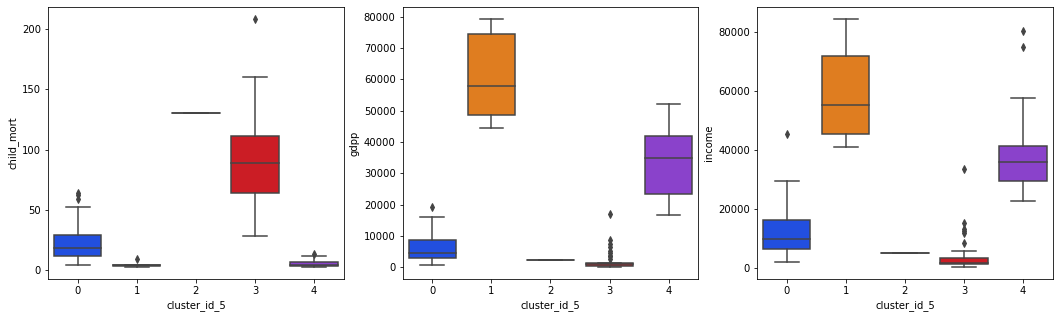

In [158]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_5', y='child_mort',
            data=ngo_country_2, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_5', y='gdpp',
            data=ngo_country_2, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_5', y='income',
            data=ngo_country_2, palette="bright")

plt.show()

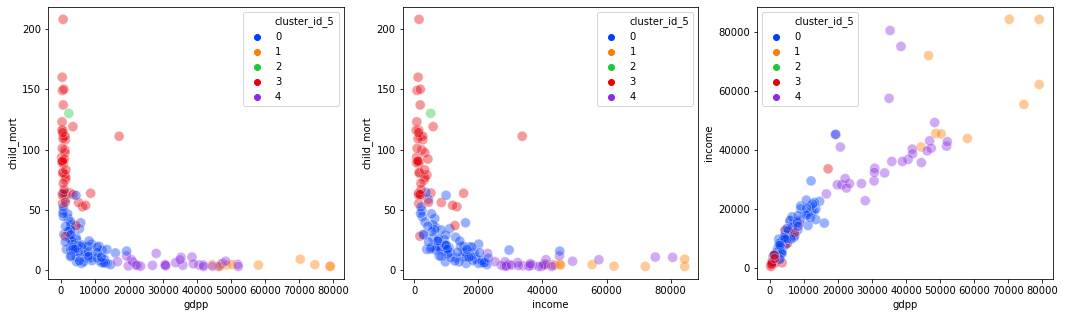

In [159]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_5',
                data=ngo_country_2, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_id_5',
                data=ngo_country_2, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id_5',
                data=ngo_country_2, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

**Insights:**
    
From the 3rd iteration taking k=5,

The result got a bit clumpsy with 5 clusters with two clusters having almost same value range. Here we can see that cluster 3 having the highest child mortality and laest gdpp and income. Lets see the countries falling under this category.


In [160]:
# Checking the CLuster means:
ngo_country_2.groupby(['cluster_id_5']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_3,cluster_id_4
cluster_id_5,,,,,,,,,,,,,
2,130.000000,589.490000,118.131000,405.420000,5150.000000,104.000000,60.500000,5.840000,2330.000000,2.000000,3.000000,2.00000,1.000000
3,90.793617,885.224660,114.751355,835.999170,3870.702128,9.951809,59.212766,4.974043,1900.255319,0.000000,0.000000,2.00000,1.000000
0,22.077778,2667.051834,391.314820,2838.126186,11897.407407,7.637889,72.898765,2.281852,6126.814815,0.037037,0.037037,0.00000,1.975309
4,5.734483,14761.413793,3069.315172,13324.065517,38948.275862,3.166310,79.531034,1.792069,34186.206897,1.000000,1.000000,0.62069,0.000000
1,4.444444,45063.788889,5537.084444,36092.144444,59438.666667,2.307667,80.711111,1.765556,61230.666667,1.000000,1.888889,1.00000,3.000000


INSIGHT: Cluster 3 & Cluster 1 seems to have highest Child Mortality and lowest Income & GDPP. Lets check the countries in these clusters to see there outcome.

In [161]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

ngo_country_2[['country','child_mort','income','gdpp']][ngo_country_2['cluster_id_5'] == 2].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
113,Nigeria,130.0,5150.0,2330.0


In [162]:
# Checking the countries in Cluster 3 to see which are the countries in that segment.

ngo_country_2[['country','child_mort','income','gdpp']][ngo_country_2['cluster_id_5'] == 3].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
66,Haiti,208.0,1500.0,662.0
132,Sierra Leone,160.0,1220.0,399.0
32,Chad,150.0,1930.0,897.0
31,Central African Republic,149.0,888.0,446.0
97,Mali,137.0,1870.0,708.0
112,Niger,123.0,814.0,348.0
3,Angola,119.0,5900.0,3530.0
37,"Congo, Dem. Rep.",116.0,609.0,334.0
25,Burkina Faso,116.0,1430.0,575.0
64,Guinea-Bissau,114.0,1390.0,547.0


**Insights:**

Here cluster 3 is having the same under developed countries which were under cluster 1 in 1st and 2nd iterations

## Choosing the model
From the above 3 Iterations of K-Means, we could see that using 3 Clusters provided a better output in terms of a balanced cluster size. So we will consider the 'K-Means with 3 Clusters' as our **FINAL MODEL**.

## Cluster Profiling

In [163]:
#New dataframe for group by & analysis

ngo_country_2_analysis =  ngo_country_2.groupby(['cluster_id_3']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])
ngo_country_2_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_4,cluster_id_5
cluster_id_3,,,,,,,,,,,,,
2,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.041667,0.062500,1.00000,2.979167
0,20.177174,3650.066288,573.165330,3759.545881,14169.456522,7.019457,73.552174,2.225652,8226.869565,0.152174,0.152174,1.73913,0.478261
1,5.122222,26440.007407,4363.303333,22045.822222,49057.333333,3.165593,80.400000,1.775185,47476.888889,1.000000,1.296296,1.00000,3.000000


In [164]:
# Creating a new field for count of observations in each cluster

ngo_country_2_analysis['Observations']=ngo_country_2[['cluster_id_3','child_mort']].groupby(['cluster_id_3']).count()
ngo_country_2_analysis


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_4,cluster_id_5,Observations
cluster_id_3,,,,,,,,,,,,,,
2,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.041667,0.062500,1.00000,2.979167,48
0,20.177174,3650.066288,573.165330,3759.545881,14169.456522,7.019457,73.552174,2.225652,8226.869565,0.152174,0.152174,1.73913,0.478261,92
1,5.122222,26440.007407,4363.303333,22045.822222,49057.333333,3.165593,80.400000,1.775185,47476.888889,1.000000,1.296296,1.00000,3.000000,27


In [165]:
# Creating a new field for proportion of observations in each cluster

ngo_country_2_analysis['Proportion']=round(ngo_country_2_analysis['Observations']/ngo_country_2_analysis['Observations'].sum(),2)


#Summary View
ngo_country_2_analysis[['child_mort','income','gdpp','Observations','Proportion']]

,child_mort,income,gdpp,Observations,Proportion
cluster_id_3,,,,,
2,91.610417,3897.354167,1909.208333,48,0.29
0,20.177174,14169.456522,8226.869565,92,0.55
1,5.122222,49057.333333,47476.888889,27,0.16


<Figure size 576x360 with 0 Axes>

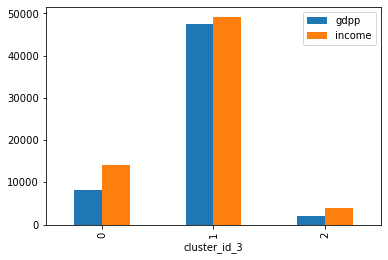

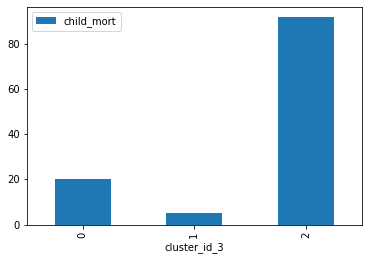

In [166]:
plt.figure(figsize=(8, 5))
ngo_country_2_plot1=ngo_country_2[['cluster_id_3','gdpp','income']].copy()
ngo_country_2_plot1=ngo_country_2_plot1.groupby('cluster_id_3').mean()
ngo_country_2_plot1.plot.bar()

ngo_country_2_plot2=ngo_country_2[['cluster_id_3','child_mort']].copy()
ngo_country_2_plot2=ngo_country_2_plot2.groupby('cluster_id_3').mean()
ngo_country_2_plot2.plot.bar()

**Interpretation of Clusters:**

**Cluster 2** has the **Highest average Child Mortality rate of ~92** when compared to other 3 clusters, and **Lowest average GDPP & Income of ~ 1909 & 3897 respectively**. All these figures clearly makes this cluster the best candidate for the financial aid from NGO. We could also see that Cluster 2 comprises of ~29% of overall data, and has ~48 observations in comparision to 167 total observations.

## Renaming the clusters 

In [167]:
ngo_country_2_analysis = ngo_country_2_analysis.rename({
    2: 'Under_Developed Countries',
    1: 'Developed Countries',
    0: 'Developing Countries'}).reset_index()

In [168]:
ngo_country_2_analysis[['cluster_id_3','child_mort','income','gdpp','Observations','Proportion']]

,cluster_id_3,child_mort,income,gdpp,Observations,Proportion
0,Under_Developed Countries,91.610417,3897.354167,1909.208333,48,0.29
1,Developing Countries,20.177174,14169.456522,8226.869565,92,0.55
2,Developed Countries,5.122222,49057.333333,47476.888889,27,0.16


**FINAL CLUSTER:** Based on the above interpretation of the cluster, we now rename all the clusters accordingly. The Cluster 2 now becomes 'Under Developed Countries', which will be of our interest. 

We will further analyse the Cluster 'Under Developed Countries' and get to know various metrics of that data set, based on which we could identify our final set of countries which needs the financial support from the NGO

## Analysis of the "Under_Developed Countries" cluster

In [169]:
ngo_country_2.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster_labels_3',
       'cluster_labels_4', 'cluster_id_3', 'cluster_id_4', 'cluster_id_5'],
      dtype='object')

In [170]:
# Countries in Cluster_id = 2, save to a new dataframe, this will form our final cluster data

final_cluster = ngo_country_2[ngo_country_2['cluster_id_3'] == 2].copy()
final_cluster = final_cluster[['country', 'child_mort', 'income', 'gdpp']]

In [171]:
final_cluster.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

,country,child_mort,income,gdpp
26,Burundi,93.6,764.0,231.0
88,Liberia,89.3,700.0,327.0
37,"Congo, Dem. Rep.",116.0,609.0,334.0
112,Niger,123.0,814.0,348.0
132,Sierra Leone,160.0,1220.0,399.0
93,Madagascar,62.2,1390.0,413.0
106,Mozambique,101.0,918.0,419.0
31,Central African Republic,149.0,888.0,446.0
94,Malawi,90.5,1030.0,459.0
50,Eritrea,55.2,1420.0,482.0


## Decision Making on the final approach

In [172]:
final_cluster.describe()

,child_mort,income,gdpp
count,48.000000,48.000000,48.000000
mean,91.610417,3897.354167,1909.208333
std,34.319855,5590.168621,2925.911009
min,28.100000,609.000000,231.000000
25%,63.675000,1390.000000,551.500000
50%,89.750000,1860.000000,932.000000
75%,111.000000,3522.500000,1465.000000
max,208.000000,33700.000000,17100.000000


**NOTE:** 
    
- Looking at the descriptive statistics of our Under Developed Countries cluster, we could notice that some of the countries have really high income and gdpp values (looking at the max values of income & gdpp). From a business problem prespective, we would want our numbers of child mortality, income and gdpp somewhere around the MEDIAN level (We decided to go with MEDIAN and not MEAN, as there seems to be a greater variablity in the income and gdpp values). So the approach we are going to take is to filter out all countries from our original list with income & gdpp less than the Median of 1860 & 932 respectively and Child Mortality >= the Median of 90. 
- We will perform the filtering in the order GDPP ---> INCOME ---> CHILD MORTALITY.

This is due to reason that, we need to identify the countries with lowest GDPP & INCOME first and then with maximum CHILD MORTALITY. This is based on the understanding that, countries with highest child mortality and having higher gdpp & income will not have any impact on the child mortality rate even after the financial aid.

## Filtering the final data based on Cluster Median¶

### Data less than median of gdpp of the cluster

NOTE: We could see that the Median values of gdpp for 'Under Developed Countries' is ~932. We will take this as a benchmark and fetch all countries from our 'ORIGINAL dataframe with gdpp <= 932.

In [173]:
Under_Developed_Countries = ngo[ngo['gdpp'] <= 932].copy()
# Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['gdpp'] <= 932]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

In [174]:
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]

,country,child_mort,gdpp,income
26,Burundi,93.6,231.0,764.0
88,Liberia,89.3,327.0,700.0
37,"Congo, Dem. Rep.",116.0,334.0,609.0
112,Niger,123.0,348.0,814.0
132,Sierra Leone,160.0,399.0,1220.0
93,Madagascar,62.2,413.0,1390.0
106,Mozambique,101.0,419.0,918.0
31,Central African Republic,149.0,446.0,888.0
94,Malawi,90.5,459.0,1030.0
50,Eritrea,55.2,482.0,1420.0


In [175]:
Under_Developed_Countries.shape

(29, 10)

### Data less than median of income of the cluster¶

NOTE: We could see that the Median values of income for 'Under Developed Countries' is ~1860. We will take this as a benchmark and fetch all countries from our 'ORIGINAL dataframe with income <= 1860.

In [176]:
Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['income'] <= 1860]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

In [177]:
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]

,country,child_mort,gdpp,income
26,Burundi,93.6,231.0,764.0
88,Liberia,89.3,327.0,700.0
37,"Congo, Dem. Rep.",116.0,334.0,609.0
112,Niger,123.0,348.0,814.0
132,Sierra Leone,160.0,399.0,1220.0
93,Madagascar,62.2,413.0,1390.0
106,Mozambique,101.0,419.0,918.0
31,Central African Republic,149.0,446.0,888.0
94,Malawi,90.5,459.0,1030.0
50,Eritrea,55.2,482.0,1420.0


In [178]:
Under_Developed_Countries.shape

(21, 10)

### Data greater than median of child mortality rate of the final cluster¶

NOTE: We could see that the Median values of Child Mortality for 'Under Developed Countries' is ~90. We will take this as a benchmark and fetch all countries from our 'ORIGINAL dataframe with Child Mortality >= 90.

In [179]:
# We create a new dataframe to store the countries satisfying the cluster median from original dataframe

Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['child_mort'] >= 90]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])


In [180]:
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]


,country,child_mort,gdpp,income
26,Burundi,93.6,231.0,764.0
37,"Congo, Dem. Rep.",116.0,334.0,609.0
112,Niger,123.0,348.0,814.0
132,Sierra Leone,160.0,399.0,1220.0
106,Mozambique,101.0,419.0,918.0
31,Central African Republic,149.0,446.0,888.0
94,Malawi,90.5,459.0,1030.0
150,Togo,90.3,488.0,1210.0
64,Guinea-Bissau,114.0,547.0,1390.0
0,Afghanistan,90.2,553.0,1610.0


In [181]:
Under_Developed_Countries.shape

(14, 10)

## Descriptive Statistics of Cluster 'Under_Developed_Countries'

In [182]:
# Save the top 10 underdeveloped list to a new df

UDC_top_10=Under_Developed_Countries[['country', 'gdpp', 'income', 'child_mort']].head(10).copy()

In [183]:
#Final country list

UDC_top_10

,country,gdpp,income,child_mort
26,Burundi,231.0,764.0,93.6
37,"Congo, Dem. Rep.",334.0,609.0,116.0
112,Niger,348.0,814.0,123.0
132,Sierra Leone,399.0,1220.0,160.0
106,Mozambique,419.0,918.0,101.0
31,Central African Republic,446.0,888.0,149.0
94,Malawi,459.0,1030.0,90.5
150,Togo,488.0,1210.0,90.3
64,Guinea-Bissau,547.0,1390.0,114.0
0,Afghanistan,553.0,1610.0,90.2


In [184]:
UDC_top_10.describe()

,gdpp,income,child_mort
count,10.00000,10.000000,10.00000
mean,422.40000,1045.300000,112.76000
std,99.62396,309.034356,25.11344
min,231.00000,609.000000,90.20000
25%,360.75000,832.500000,91.27500
50%,432.50000,974.000000,107.50000
75%,480.75000,1217.500000,121.25000
max,553.00000,1610.000000,160.00000


## Univariate Analysis of Cluster 'Under_Developed_Countries': Recommended 10 

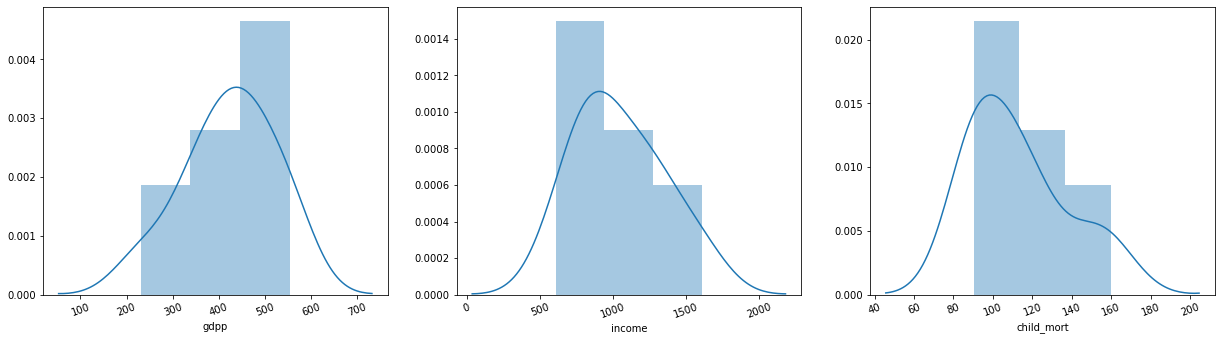

In [185]:
plt.figure(figsize=(21, 18))
features = ['gdpp','income','child_mort']
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(UDC_top_10[i[1]])
    plt.xticks(rotation=20)

## Bivariate Analysis of Cluster 'Under_Developed_Countries': Recommended 10

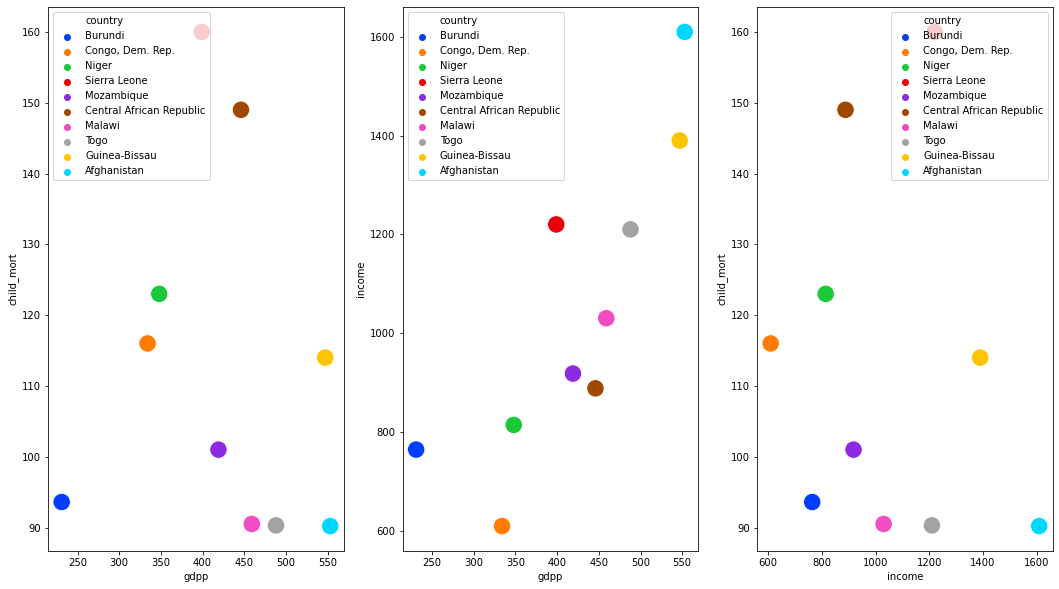

In [186]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 10))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='country',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')
plt.subplot(1, 3, 2)
sns.scatterplot(x='gdpp', y='income', hue='country',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')
plt.subplot(1, 3, 3)
sns.scatterplot(x='income', y='child_mort', hue='country',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')
plt.show()

# Conclusion

- A dataset has been provided containing 167 countries with their corresponding socio-economic  and health factors. 
- All the countries have been categorized into 3 clusters : Developed, Developing and Under Developed countries.
- Based on our Clustering Analysis,  top 10 countries from the  'Under Developed Countries' cluster has been identified and recommended which are in dire need of the Financial Aid from the Help International NGO. Recommendation has been done based on K-Means clustering with number of clusters as 3 and considering financial factor first. This output is purely based on the dataset we used and various analytical methodology we performed.

Top 10 Recommended countries which are in dire need of funds (Top 5 marked as bold):
- **Burundi**
- **Congo, Dem, Rep**
- **Niger**
- **Sierra Leone**
- **Mozambique**
- Central African Republic
- Malawi
- Togo
- Guinea-Bissau
- Afghanistan

These countries have 
- low gdpp
- low income and 
- high child mortality

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**
